In [17]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from tqdm.notebook import tqdm

import torch

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd()))

from berp.generators import thresholded_recognition

In [12]:
X_word, X_phon, y, p_word = thresholded_recognition.sample_item("In the episode, she learns that her then estranged husband is releasing a new song",
                                                                recognition_threshold=torch.tensor(0.9))

in the episode she learns that her then estranged husband is releasing a new song
Ġthe ['the', 'the', 'and', 'of', 'to', 'a', 's', 'in', 'is', 'that']
Ġepisode ['episode', 'same', 'past', 'world', 'early', 'first', 'end', 'name', 'united', 'future']
Ġshe ['she', 's', 'of', 'where', 'that', 'is', 'was', 'when', 'and', 'i']
Ġlearns ['learns', 's', 'says', 'said', 'is', 'had', 'tells', 'has', 'talks', 'told']
Ġthat ['that', 'about', 'the', 'of', 'to', 'she', 'from', 'how', 'a', 'her']
Ġher ['her', 'she', 'her', 'a', 'there', 'he', 'it', 'they', 'his', 'one']
Ġthen ['then', 'mother', 'husband', 'parents', 'brother', 'sister', 'boyfriend', 'son', 'dad', 'family']
Ġestranged ['estranged', 'husband', 'boyfriend', 'girlfriend', 'fian', 'wife', 'father', 'boss', 'best', 'fiance']
Ġhusband ['husband', 'father', 'son', 'mother', 'boyfriend', 'brother', 'wife', 'lover', 'sister', 'daughter']
Ġis ['is', 'is', 'has', 'was', 'had', 's', 'and', 'will', 'died', 'of']
Ġreleasing ['releasing', 'the', 'no

In [13]:
X_word

,token,time,recognition_point,surprisal
token_idx,,,,
0,the,0.335938,0,5.385768
1,episode,2.109375,3,11.345507
2,she,4.101562,0,9.465185
3,learns,6.312500,4,9.862487
4,that,7.882812,2,1.192770
5,her,9.070312,0,3.989702
6,then,10.968750,4,12.735794
7,estranged,12.203125,3,10.160424
8,husband,14.335938,0,1.075088


In [14]:
X_phon

time phoneme  surprisal
token_idx phon_idx                              
0         0          0.335938       t   7.422825
          1          0.554688       h   7.201309
          2          0.750000       e   7.370876
1         0          1.476562       e  13.330614
          1          1.796875       p  13.143036
...                       ...     ...        ...
12        2         22.062500       w   7.167082
13        0         22.789062       s   7.493398
          1         23.085938       o   7.524882
          2         23.343750       n   7.494069
          3         23.445312       g   7.399758

[65 rows x 3 columns]

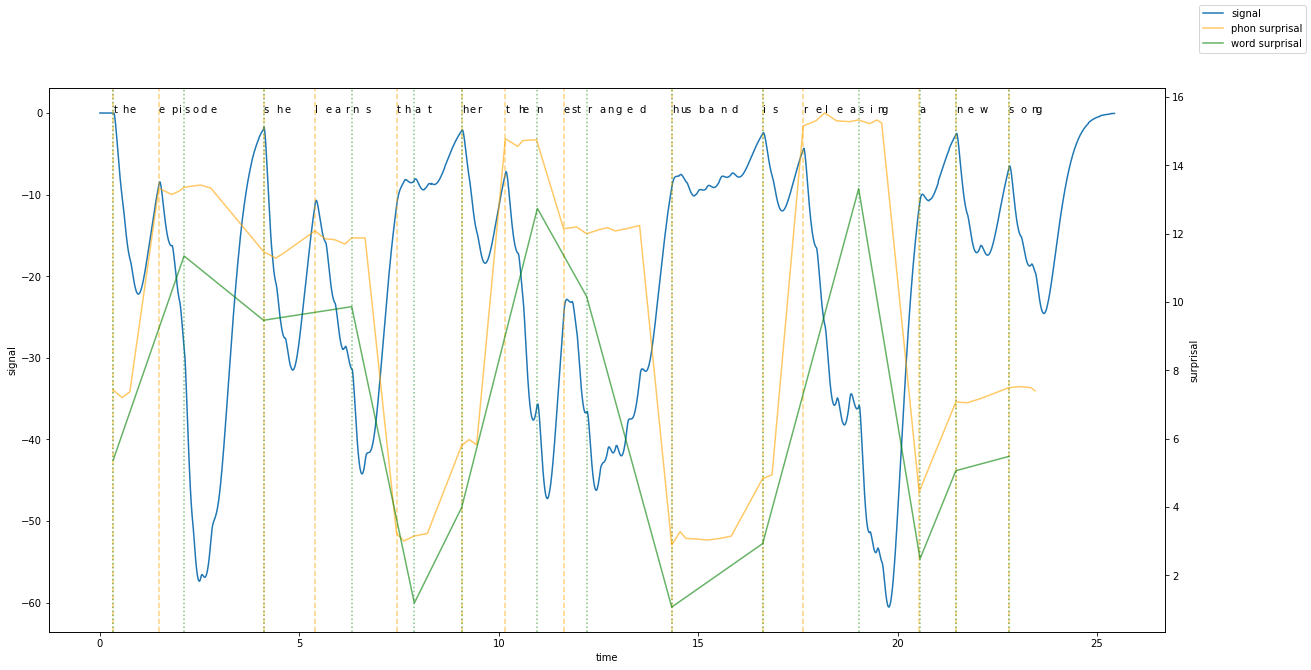

In [15]:
plt.subplots(figsize=(20, 10))
ax = sns.lineplot(data=y, x="time", y="signal")
twinx = ax.twinx()
sns.lineplot(data=X_phon, x="time", y="surprisal", color="orange", alpha=0.6, ax=twinx)
sns.lineplot(data=X_word, x="time", y="surprisal", color="green", alpha=0.6, ax=twinx)
ax.figure.legend(["signal", "phon surprisal", "word surprisal"])

word_onsets = X_phon.groupby("token_idx").apply(lambda xs: xs.iloc[0]).time
for _, phon in X_phon.iterrows():
    ax.annotate(phon.phoneme, xy=(phon.time, 0.1))
for onset in word_onsets:
    ax.axvline(onset, linestyle="--", color="orange", alpha=0.5)
for recognition_onset in X_word.time:
    ax.axvline(recognition_onset, linestyle=":", color="green", alpha=0.5)

## Generate whole dataset

In [44]:
text = """
Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'
So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.

There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, `Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see it pop down a large rabbit-hole under the hedge.

In another moment down went Alice after it, never once considering how in the world she was to get out again.

The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well.

Either the well was very deep, or she fell very slowly, for she had plenty of time as she went down to look about her and to wonder what was going to happen next. First, she tried to look down and make out what she was coming to, but it was too dark to see anything; then she looked at the sides of the well, and noticed that they were filled with cupboards and book-shelves; here and there she saw maps and pictures hung upon pegs. She took down a jar from one of the shelves as she passed; it was labelled `ORANGE MARMALADE', but to her great disappointment it was empty: she did not like to drop the jar for fear of killing somebody, so she managed to put it into one of the cupboards as she fell past it.

`Well,' thought Alice to herself, `after such a fall as this, I shall think nothing of tumbling down stairs! How brave they'll all think me at home! Why, I wouldn't say anything about it, even if I fell off the top of the house!' (Which was very likely true.)

Down, down, down. Would the fall never come to an end! `I wonder how many miles I've fallen by this time?' she said aloud. `I must be getting somewhere near the center of the earth. Let me see: that would be four thousand miles down, I think--' (for, you see, Alice had learnt several things of this sort in her lessons in the schoolroom, and though this was not a very good opportunity for showing off her knowledge, as there was no one to listen to her, still it was good practice to say it over) `--yes, that's about the right distance--but then I wonder what Latitude or Longitude I've got to?' 
Alice had no idea what Latitude was, or Longitude either, but thought they were nice grand words to say.
""".strip()
sentences = [s.strip().replace("\n", "") for s in re.split(r"[.?!]", text)]
sentences = [s for s in sentences if s]
sentences

["Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation",
 "'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her",
 'There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, `Oh dear',
 'Oh dear',
 'I shall be late',
 "' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and loo

In [45]:
X_word, X_phon, y, p_word = thresholded_recognition.sample_dataset(sentences)

  0%|          | 0/22 [00:00<?, ?it/s]

alice was beginning to get very tired of sitting by her sister on the bank and of having nothing to do once or twice she had peeped into the book her sister was reading but it had no pictures or conversations in it and what is the use of a book thought alice without pictures or conversation
so she was considering in her own mind as well as she could for the hot day made her feel very sleepy and stupid whether the pleasure of making a daisychain would be worth the trouble of getting up and picking the daisies when suddenly a white rabbit with pink eyes ran close by her
there was nothing so very remarkable in that nor did alice think it so very much out of the way to hear the rabbit say to itself oh dear
oh dear
i shall be late
when she thought it over afterwards it occurred to her that she ought to have wondered at this but at the time it all seemed quite natural but when the rabbit actually took a watch out of its waistcoatpocket and looked at it and then hurried on alice started to he

In [46]:
epochs = thresholded_recognition.dataset_to_epochs(X_word, y)

  0%|          | 0/651 [00:00<?, ?it/s]

In [47]:
merged_df = pd.merge(epochs, X_word, left_index=True, right_index=True)
merged_df["baselined_N400"] = merged_df.value_N400 - merged_df.baseline_N400

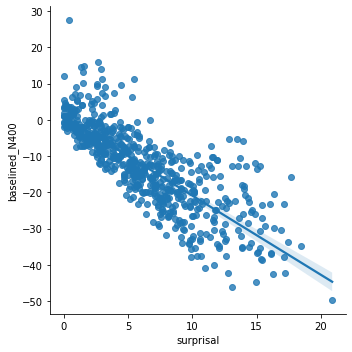

In [48]:
sns.lmplot(data=merged_df, x="surprisal", y="baselined_N400")